In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
startups = pd.read_csv("C:\\Users\\Admin\\Downloads\\50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup = pd.get_dummies(startups,columns=['State'])

In [7]:
startup

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [8]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


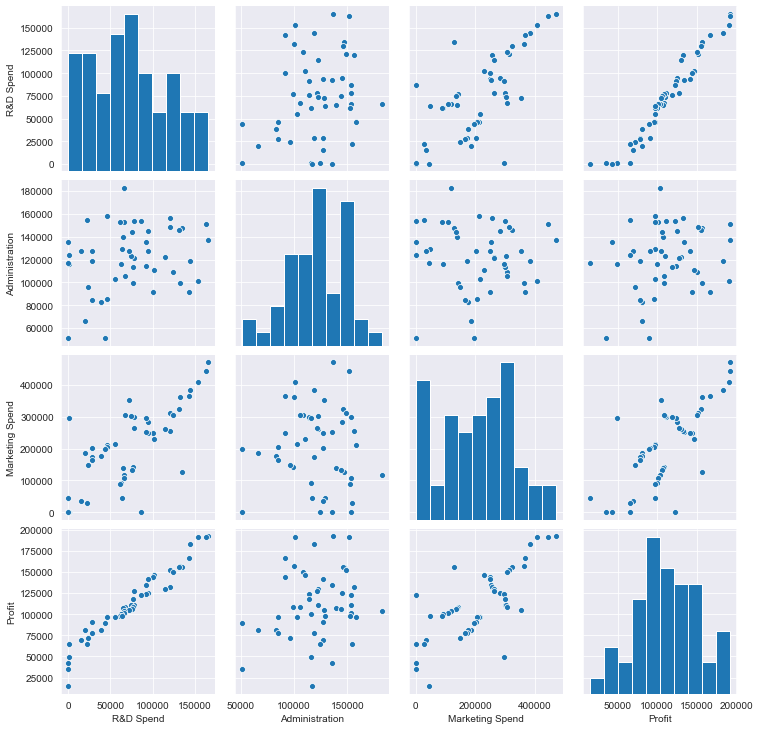

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [11]:
data1 = startups.rename(columns = {'R&D Spend': 'RD', 'Marketing Spend': 'MS','Administration':'A','Profit':'P'}, inplace = False)

In [12]:
import statsmodels.formula.api as smf 
model = smf.ols('P~RD+MS+A',data=data1).fit()

In [13]:
model.params

Intercept    50122.192990
RD               0.805715
MS               0.027228
A               -0.026816
dtype: float64

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RD           17.846374
MS            1.655077
A            -0.525507
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
MS           1.047168e-01
A            6.017551e-01
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           4.53e-30
Time:                        13:18:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
A             -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
ml_v=smf.ols('P~RD',data = data1).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [18]:
ml_w=smf.ols('P~MS',data = data1).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [19]:
ml_w=smf.ols('P~A',data = data1).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    3.040044
A            1.419493
dtype: float64 
 Intercept    0.003824
A            0.162217
dtype: float64


In [20]:
ml_wv=smf.ols('P~RD+MS+A',data = data1).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept     7.626218
RD           17.846374
MS            1.655077
A            -0.525507
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
MS           1.047168e-01
A            6.017551e-01
dtype: float64


In [23]:
rsq_rd = smf.ols('RD~MS+A',data=data1).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_ms = smf.ols('MS~RD+A',data=data1).fit().rsquared
vif_ms = 1/(1-rsq_ms)

rsq_a = smf.ols('A~RD+MS',data=data1).fit().rsquared
vif_a = 1/(1-rsq_a)

d1 = {'Variables' :['RD','MS','A'], 'VIF' : [vif_rd,vif_ms,vif_a]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RD,2.468903
1,MS,2.326773
2,A,1.175091


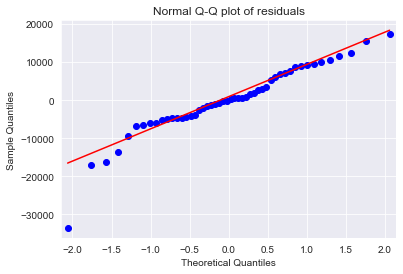

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

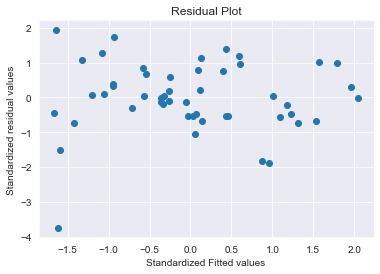

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

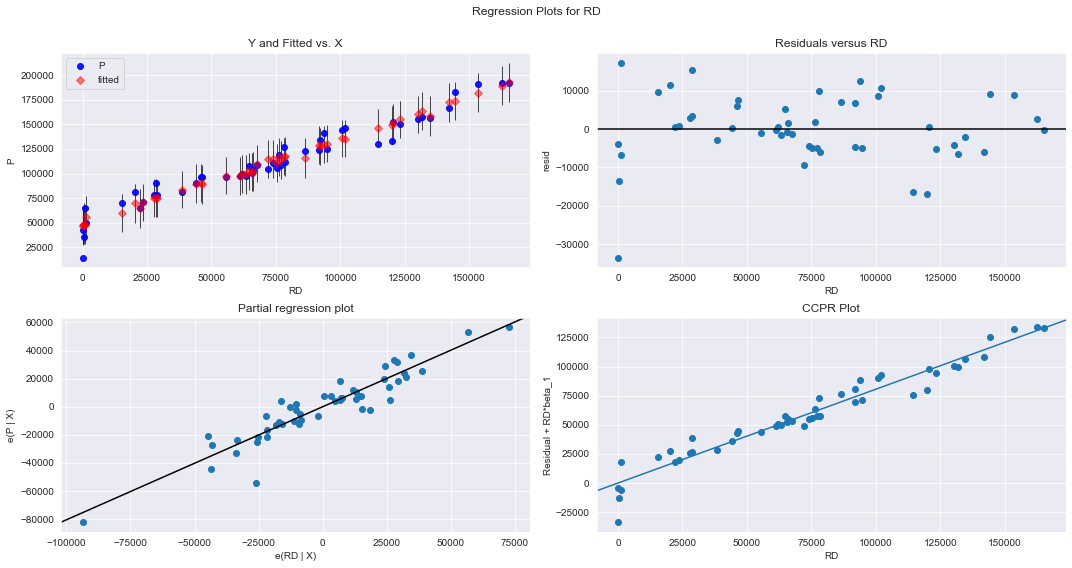

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

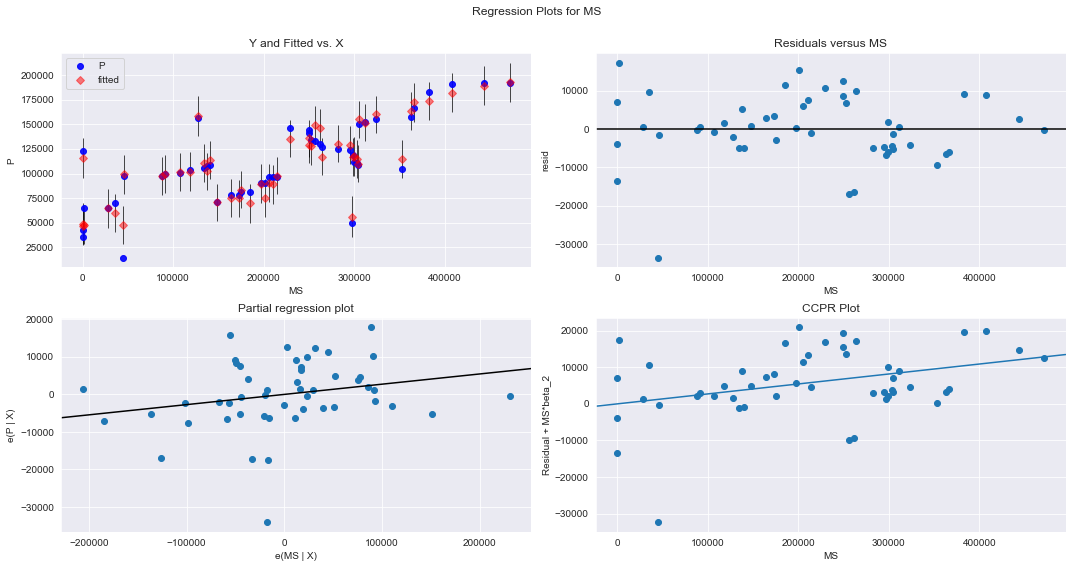

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

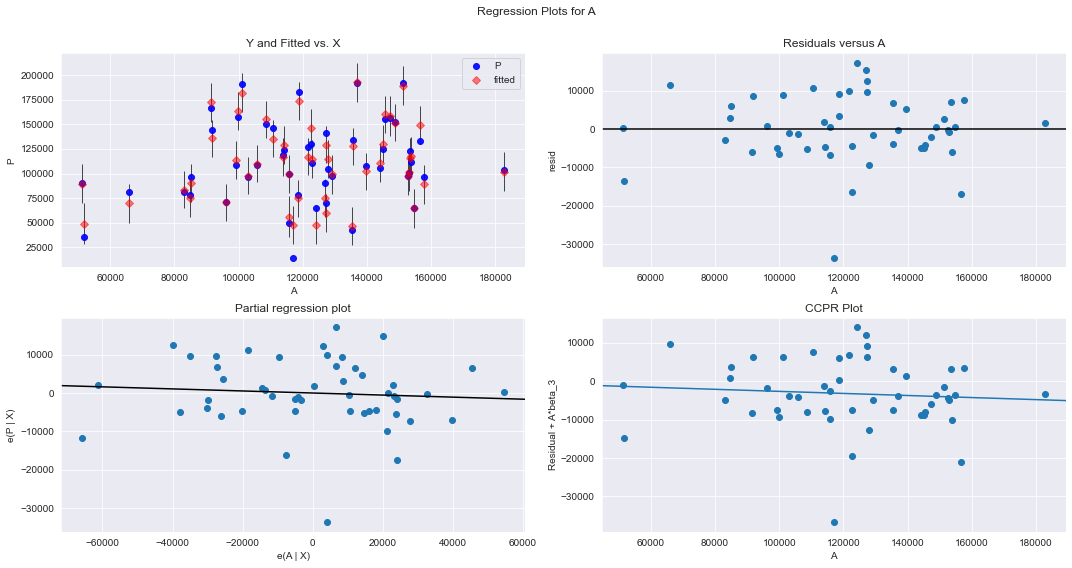

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "A", fig=fig)
plt.show()

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-33-f8c9922ee5bd>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data1)), np.round(c, 3))


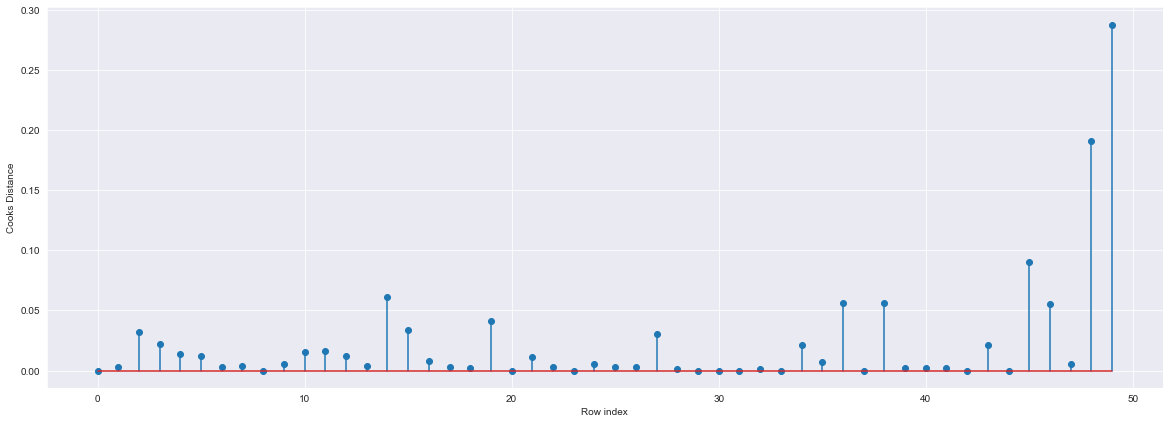

In [33]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432695)

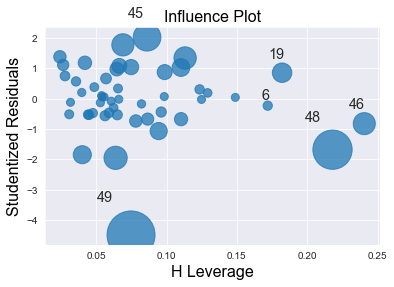

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [36]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [37]:
data1[data1.index.isin([48,49])]

,RD,A,MS,State,P
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [38]:
data1.head()

,RD,A,MS,State,P
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [39]:
startup_new = pd.read_csv("C:\\Users\\Admin\\Downloads\\50_Startups.csv")

In [40]:
startup1=startup_new.drop(startup_new.index[[48,49]],axis=0).reset_index()
startup1

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [41]:
startup1=startup1.drop(['index'],axis=1)

In [42]:
startup1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
startup2 = startup1.rename(columns = {'R&D Spend': 'RD', 'Marketing Spend': 'MS','Administration':'A','Profit':'P'}, inplace = False)

In [45]:
final_ml_V= smf.ols('P~RD+A',data = startup2).fit()

In [46]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9613542664192156, 994.3402293693792)

In [47]:
final_ml_W= smf.ols('P~MS+A',data = startup2).fit()

In [48]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.5625802937857887, 1110.8101546830774)

In [49]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-54-b048ae816a83>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup2)),np.round(c_V,3));


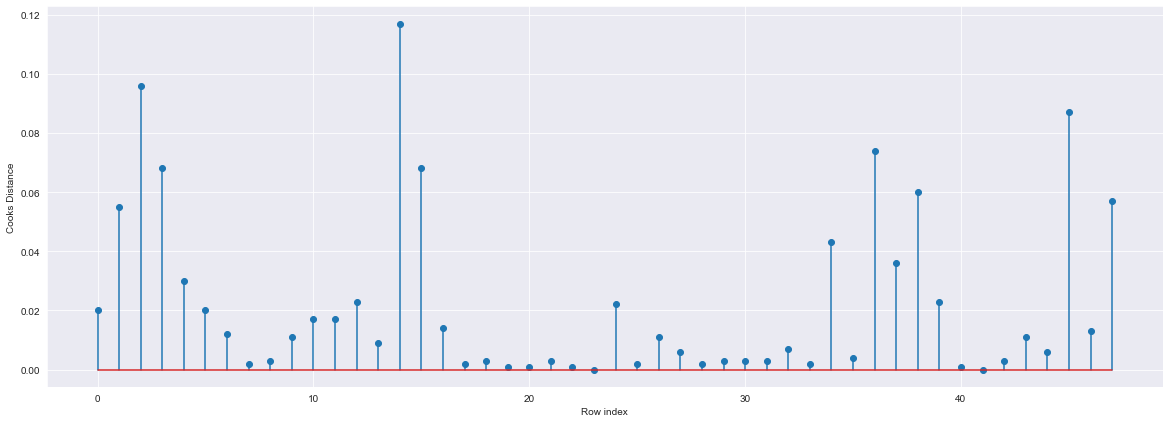

In [54]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [52]:
(np.argmax(c_V),np.max(c_V))

(14, 0.11654464976722423)

In [55]:
startup3=startup2.drop(startup2.index[[3,14]],axis=0)

In [56]:
startup3

,RD,A,MS,State,P
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96
10,101913.08,110594.11,229160.95,Florida,146121.95


In [57]:
startup4=startup3.reset_index()
startup4

,index,RD,A,MS,State,P
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,4,142107.34,91391.77,366168.42,Florida,166187.94
4,5,131876.90,99814.71,362861.36,New York,156991.12
5,6,134615.46,147198.87,127716.82,California,156122.51
6,7,130298.13,145530.06,323876.68,Florida,155752.60
7,8,120542.52,148718.95,311613.29,New York,152211.77
8,9,123334.88,108679.17,304981.62,California,149759.96
9,10,101913.08,110594.11,229160.95,Florida,146121.95


In [58]:
startup5=startup4.drop(['index'],axis=1)

In [59]:
startup5

,RD,A,MS,State,P
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,142107.34,91391.77,366168.42,Florida,166187.94
4,131876.90,99814.71,362861.36,New York,156991.12
5,134615.46,147198.87,127716.82,California,156122.51
6,130298.13,145530.06,323876.68,Florida,155752.60
7,120542.52,148718.95,311613.29,New York,152211.77
8,123334.88,108679.17,304981.62,California,149759.96
9,101913.08,110594.11,229160.95,Florida,146121.95


In [61]:
final_ml_V= smf.ols('P~RD+MS+A',data = startup5).fit()

In [62]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-63-a41ece72b56f>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup5)),np.round(c_V,3));


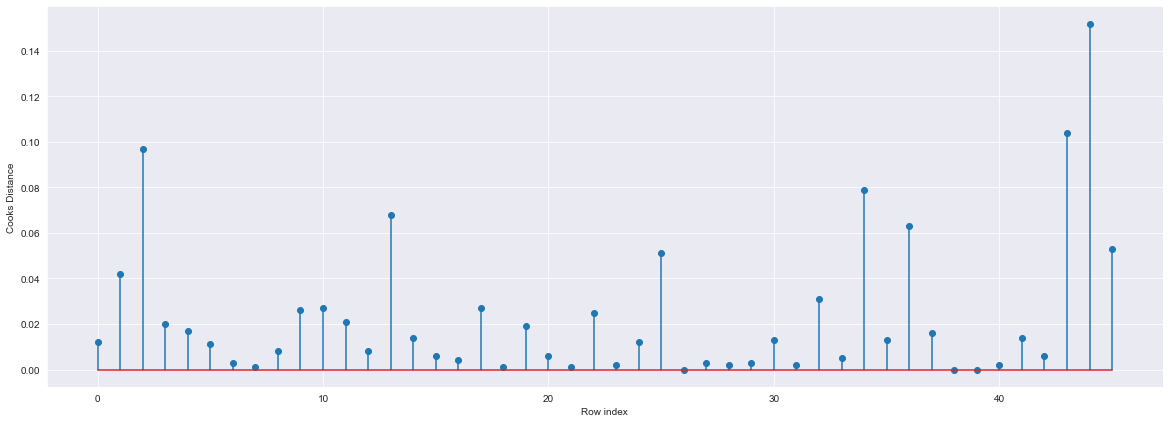

In [63]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [64]:
(np.argmax(c_V),np.max(c_V))

(44, 0.15227856512260318)

In [65]:
final_ml_V= smf.ols('P~RD+MS+A',data = startup5 ).fit()

In [66]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9658777464793972, 947.6542516706241)

In [68]:
pred_y = final_ml_V.predict(startup5)

In [69]:
pred_y

0     188964.878062
1     185684.004093
2     180233.106871
3     171086.818583
4     162563.600692
5     158863.978228
6     158581.668179
7     150537.965352
8     154504.843107
9     136318.945658
10    136534.468712
11    129504.466282
12    127689.772837
13    146225.314066
14    117478.393769
15    129813.006250
16    129147.456282
17    118521.486487
18    116982.556020
19    116827.369549
20    114855.426335
21    110567.727832
22    115828.120916
23    104135.395288
24    112283.212946
25    113903.745856
26    102915.728334
27    103771.435654
28    102412.106420
29     99963.175053
30    102196.453229
31     99784.374012
32     90018.838409
33     92994.562001
34     77267.453756
35     92899.702502
36     73205.814369
37     86728.269006
38     77294.858707
39     78060.878856
40     73912.221054
41     64286.260589
42     68166.426911
43     52458.029705
44     57684.736632
45     51113.456546
dtype: float64